fonte: https://basedosdados.org/dataset/9a2368e4-2fa6-4b42-88b7-026aa048f5ab?table=82e257d0-3564-4122-ba4a-78a039ca89b7

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [65]:
dados =pd.read_csv('dados_basedosdados.csv')
dados.head(10)

,ano,sigla_uf,id_municipio,grupo,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,2016,AL,2704302,Grupo 1,449,21,2.0,5.0,59.0,0.0,...,11.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,2.0
1,2016,CE,2304400,Grupo 1,965,27,15.0,8.0,39.0,1.0,...,3.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,5.0
2,2016,ES,3205309,Grupo 1,51,0,3.0,0.0,9.0,1.0,...,14.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2016,GO,5208707,Grupo 1,452,33,14.0,3.0,100.0,0.0,...,16.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0
4,2016,MA,2111300,Grupo 1,498,23,12.0,1.0,27.0,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
5,2016,MT,5103403,Grupo 1,196,18,4.0,3.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,2.0
6,2016,PA,1501402,Grupo 1,878,41,20.0,10.0,39.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,7.0
7,2016,PB,2507507,Grupo 1,341,8,1.0,4.0,5.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,1.0
8,2016,PE,2611606,Grupo 1,624,5,11.0,6.0,15.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,5.0
9,2016,PI,2211001,Grupo 1,341,22,4.0,1.0,7.0,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


### Etapa 1: Limpeza de Dados

In [66]:
# Substituir NAN por 0

dados = dados.fillna(0)
dados

,ano,sigla_uf,id_municipio,grupo,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,2016,AL,2704302,Grupo 1,449,21,2.0,5.0,59.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,2016,CE,2304400,Grupo 1,965,27,15.0,8.0,39.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0
2,2016,ES,3205309,Grupo 1,51,0,3.0,0.0,9.0,1.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,GO,5208707,Grupo 1,452,33,14.0,3.0,100.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2016,MA,2111300,Grupo 1,498,23,12.0,1.0,27.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2021,AC,1200401,Grupo 3,92,4,1.0,0.0,6.0,0.0,...,6.0,0.0,0.0,64.0,200.0,44.0,0.0,0.0,0.0,0.0
158,2021,AM,1302603,Grupo 3,1060,44,12.0,4.0,69.0,0.0,...,5.0,56.0,193.0,249.0,1454.0,191.0,0.0,0.0,0.0,0.0
159,2021,AP,1600303,Grupo 3,184,18,9.0,0.0,119.0,0.0,...,36.0,0.0,0.0,0.0,520.0,156.0,0.0,0.0,0.0,0.0
160,2021,RO,1100205,Grupo 3,161,5,6.0,0.0,6.0,0.0,...,3.0,111.0,286.0,397.0,416.0,109.0,0.0,0.0,0.0,0.0


Filtrando as colunas relevantes

In [67]:
del dados['id_municipio']
del dados['grupo']
dados

,ano,sigla_uf,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,quantidade_mortes_intervencao_policial_militar_em_servico,quantidade_mortes_intervencao_policial_civil_fora_de_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,2016,AL,449,21,2.0,5.0,59.0,0.0,57.0,0.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,2016,CE,965,27,15.0,8.0,39.0,1.0,23.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0
2,2016,ES,51,0,3.0,0.0,9.0,1.0,6.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,GO,452,33,14.0,3.0,100.0,0.0,76.0,0.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2016,MA,498,23,12.0,1.0,27.0,0.0,27.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2021,AC,92,4,1.0,0.0,6.0,0.0,0.0,0.0,...,6.0,0.0,0.0,64.0,200.0,44.0,0.0,0.0,0.0,0.0
158,2021,AM,1060,44,12.0,4.0,69.0,0.0,0.0,0.0,...,5.0,56.0,193.0,249.0,1454.0,191.0,0.0,0.0,0.0,0.0
159,2021,AP,184,18,9.0,0.0,119.0,0.0,0.0,0.0,...,36.0,0.0,0.0,0.0,520.0,156.0,0.0,0.0,0.0,0.0
160,2021,RO,161,5,6.0,0.0,6.0,0.0,0.0,0.0,...,3.0,111.0,286.0,397.0,416.0,109.0,0.0,0.0,0.0,0.0


In [90]:
# Selecionar todas as colunas após as duas primeiras (ano e sigla_uf)
colunas_para_filtrar = dados.columns[2:] 

# Lista para armazenar as colunas relevantes
colunas_relevantes = ['ano', 'sigla_uf'] 

# Definir o limite para considerar a coluna relevante
limite_valores_relevantes = 0.1 * len(dados)  # Por exemplo, consideramos relevante se mais de 10% dos valores estão fora do intervalo

# Percorrer as colunas para verificar os valores
for coluna in colunas_para_filtrar:
    # Verificar se a maioria dos valores está abaixo de 1
    valores_dentro_do_range = dados[(dados[coluna] <= 1)][coluna]
    
    # Verificar se a maioria dos valores está fora do range de 0 a 30
    if len(valores_dentro_do_range) < limite_valores_relevantes:
        colunas_relevantes.append(coluna)

# Criar um novo DataFrame apenas com as colunas relevantes
dados_filtrados = dados[colunas_relevantes]

In [92]:
dados_filtrados
# Abaixo se encontram as categorias que serão usadas no restante do projeto

,ano,sigla_uf,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_mortes_intervencao_policial,quantidade_mortes_violentas_intencionais,quantidade_estupro,quantidade_roubo_veiculos,quantidade_furto_veiculos,quantidade_roubo_furto_veiculos
0,2016,AL,449,21,59.0,531,155.0,1233.0,305.0,1538.0
1,2016,CE,965,27,39.0,1046,458.0,6415.0,2820.0,9235.0
2,2016,ES,51,0,9.0,63,25.0,227.0,338.0,565.0
3,2016,GO,452,33,100.0,599,161.0,7298.0,3733.0,11031.0
4,2016,MA,498,23,27.0,560,224.0,1678.0,487.0,2165.0
...,...,...,...,...,...,...,...,...,...,...
157,2021,AC,92,4,6.0,97,213.0,792.0,303.0,1095.0
158,2021,AM,1060,44,69.0,1185,590.0,2235.0,1710.0,3945.0
159,2021,AP,184,18,119.0,330,316.0,232.0,248.0,480.0
160,2021,RO,161,5,6.0,178,264.0,0.0,0.0,2537.0


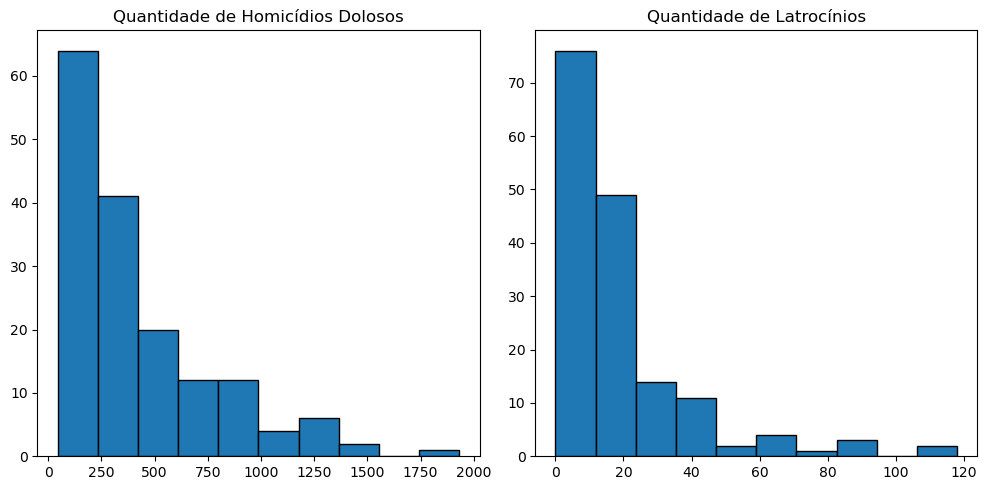

In [70]:
# Criar subplots lado a lado
plt.figure(figsize=(10, 5))

# Subplot 1: Histograma de 'quantidade_latrocinio'
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, subplot 1
plt.hist(dados['quantidade_latrocinio'], edgecolor='black')
plt.title('Quantidade de Latrocínios')

# Subplot 2: Histograma de 'quantidade_homicidio_doloso'
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, subplot 2
plt.hist(dados['quantidade_homicidio_doloso'], edgecolor='black')
plt.title('Quantidade de Homicídios Dolosos')


plt.tight_layout()  # Ajusta automaticamente a disposição dos subplots para evitar sobreposição
plt.show()

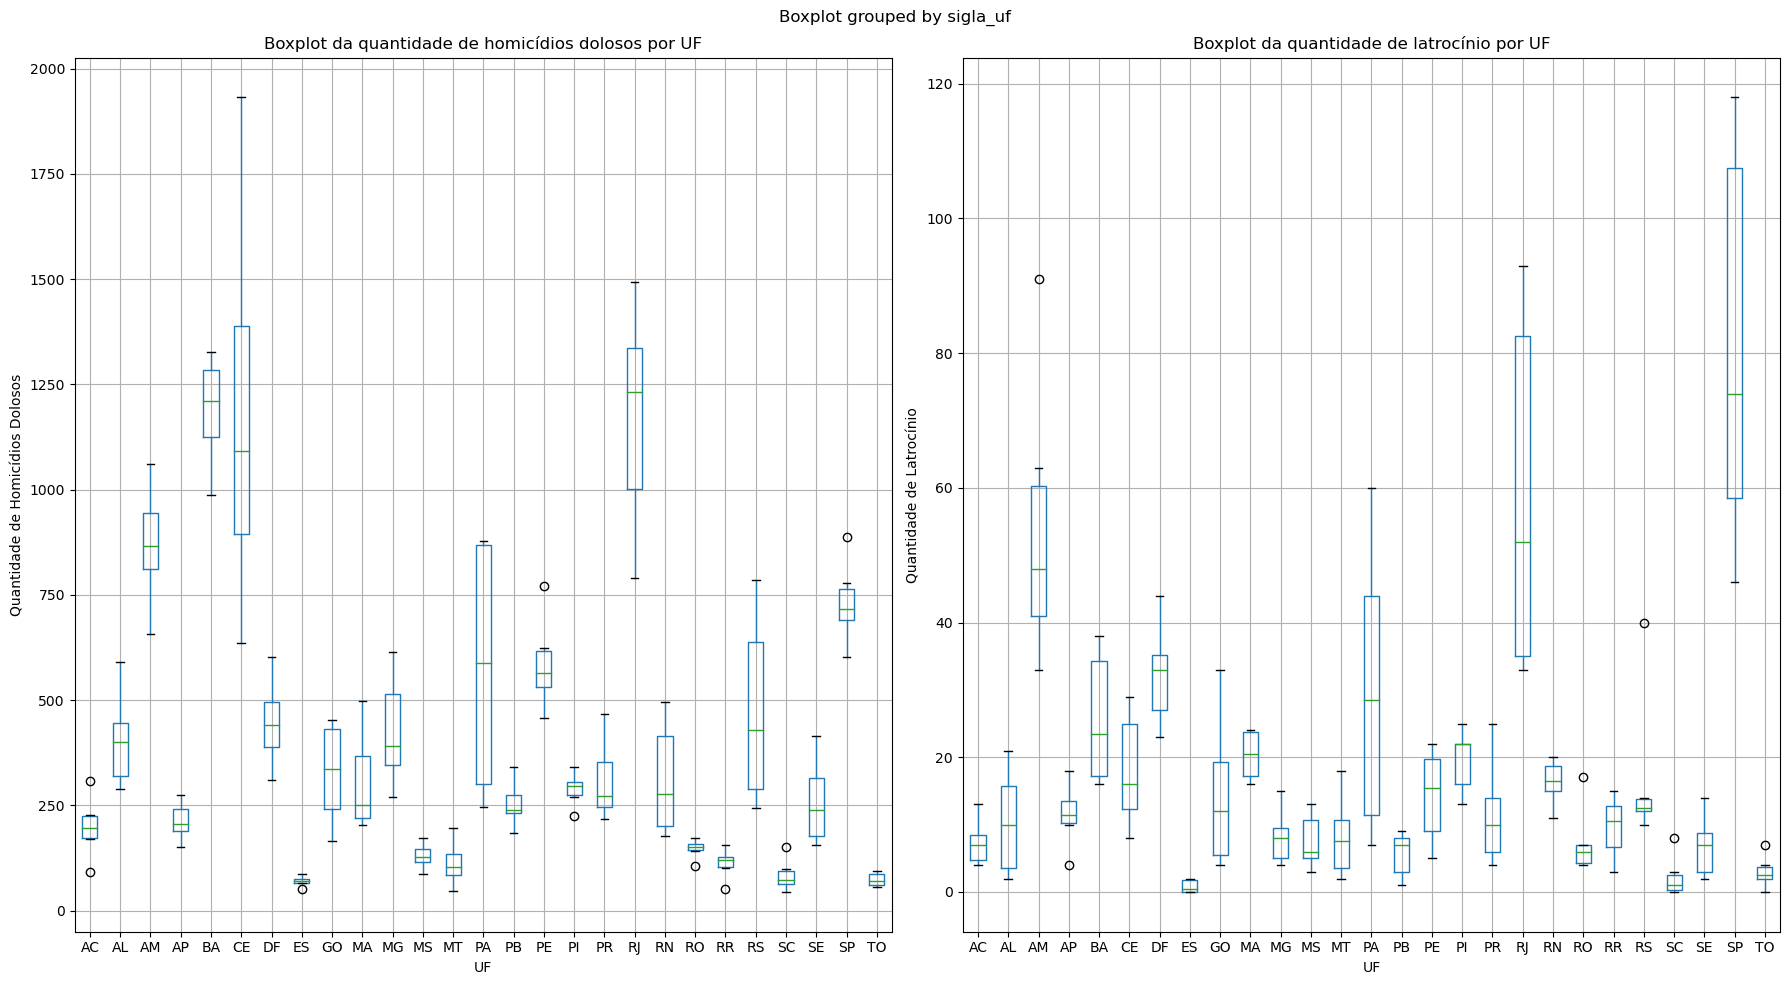

In [95]:
# Criar uma figura com subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# Boxplot da quantidade de homicídios dolosos por UF
dados.boxplot('quantidade_homicidio_doloso', 'sigla_uf', ax=axs[0])
axs[0].set_title('Boxplot da quantidade de homicídios dolosos por UF')
axs[0].set_xlabel('UF')
axs[0].set_ylabel('Quantidade de Homicídios Dolosos')

# Boxplot da quantidade de latrocínio por UF
dados.boxplot('quantidade_latrocinio', 'sigla_uf', ax=axs[1])
axs[1].set_title('Boxplot da quantidade de latrocínio por UF')
axs[1].set_xlabel('UF')
axs[1].set_ylabel('Quantidade de Latrocínio')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

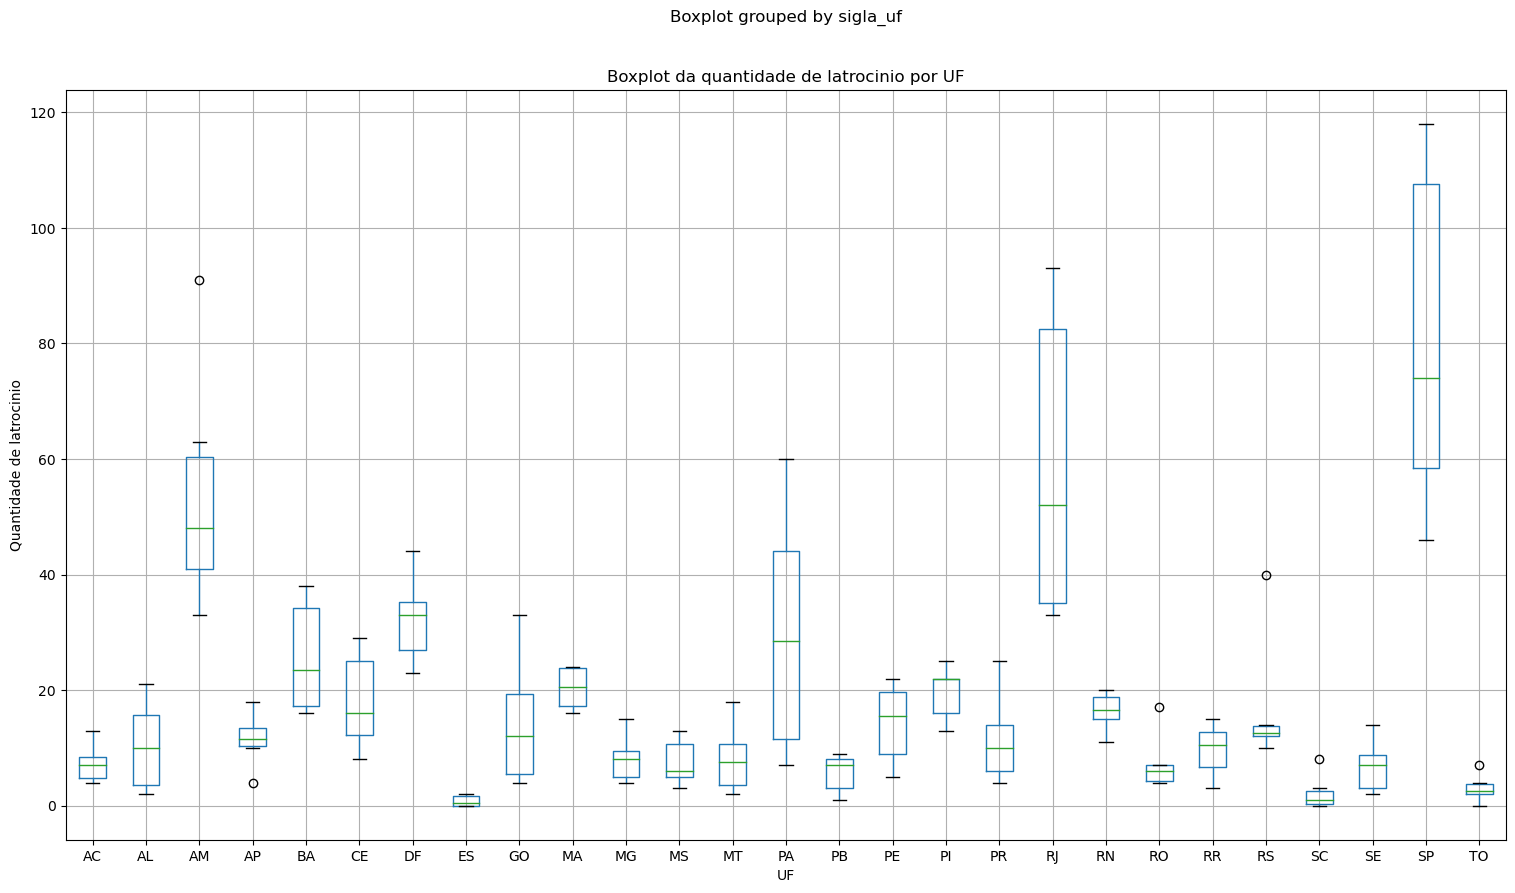

In [72]:
# Plotar o boxplot com tamanho da figura ajustado
fig, ax = plt.subplots(figsize=(18, 10))
dados.boxplot('quantidade_latrocinio', 'sigla_uf', ax=ax)
ax.set_title('Boxplot da quantidade de latrocinio por UF')
ax.set_xlabel('UF')
ax.set_ylabel('Quantidade de latrocinio')
plt.show()

In [73]:
# Dado discrepante sobre a quantidade de homicídeis dolosos em SP, descoberto apartir do boxplot

SP = dados.loc[dados.sigla_uf =='SP']
SP.quantidade_homicidio_doloso.describe()

count      6.000000
mean     730.666667
std       95.393221
min      603.000000
25%      691.000000
50%      716.000000
75%      763.500000
max      887.000000
Name: quantidade_homicidio_doloso, dtype: float64